In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

In [2]:
ev_df = pd.read_csv("data/ev_sales/ev_data_preprocessed.csv")
asthma_df = pd.read_csv("odds_ratio_module/combined_OR_aOR.csv")

In [3]:


df = ev_df.merge(asthma_df, how='left', on=['state_code', 'year'])

In [4]:
df

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,ZEV Mandates,population,at_risk,total_incidence,incidence_trap,PR,IR,AF,OR,aOR
0,Alabama,0,NaN,18,NaN,55,NaN,2011,Alabama,1,...,0,1123827,1025208,8530,865,0.087753,0.00832,0.101333,4.151245e-01,NaN
1,Alaska,0,NaN,2,NaN,4,NaN,2011,Alaska,2,...,0,188580,172032,1432,0,0.087753,0.00832,0.000000,8.574561e-09,NaN
2,Arizona,0,NaN,355,NaN,102,NaN,2011,Arizona,4,...,0,1615952,1480061,12315,4980,0.084094,0.00832,0.404398,1.659567e+00,1.280341
3,Arkansas,0,NaN,2,NaN,20,NaN,2011,Arkansas,5,...,0,711633,649186,5402,746,0.087753,0.00832,0.138113,5.682501e-01,NaN
4,California,19,NaN,5062,NaN,1656,NaN,2011,California,6,...,1,9244611,8433370,70167,29324,0.087753,0.00832,0.417916,1.714878e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Virginia,0,0.0,5677,0.0153,1337,0.0036,2019,Virginia,51,...,0,1860848,1724639,10676,1406,0.073197,0.00619,0.131665,8.312632e-01,NaN
455,Washington,0,0.0,10256,0.0359,1916,0.0067,2019,Washington,53,...,0,1663061,1541330,9541,1532,0.073197,0.00619,0.160530,1.014282e+00,NaN
456,West Virginia,0,0.0,179,0.0035,71,0.0014,2019,West Virginia,54,...,0,359567,333248,2063,0,0.073197,0.00619,0.000000,7.694841e-09,NaN
457,Wisconsin,0,0.0,1381,0.0057,581,0.0024,2019,Wisconsin,55,...,0,1266597,1214574,7519,462,0.041074,0.00619,0.061443,3.889718e-01,0.188445


In [5]:
df['pre_trap'] = df['population']*df['PR']*df['AF']

In [17]:
df['ev_market_share'] = df['ev_sales']/df['total']
df['nonev_market_share'] = df['nonev_sales']/df['total']

In [35]:
df = df[df['OR'] != 9999]

In [36]:
def calco(df):
    return df[['ev_sales', 'nonev_sales', 'OR', 'AF', 'incidence_trap', 'pre_trap', 'ev_market_share', 'nonev_market_share']].corr()

In [37]:
calco(df)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share
ev_sales,1.000000,0.608648,0.288861,0.242603,0.656029,0.624538,0.708066,-0.708066
nonev_sales,0.608648,1.000000,0.235216,0.258892,0.805701,0.822066,0.300471,-0.300471
OR,0.288861,0.235216,1.000000,0.883378,0.461140,0.403938,0.364903,-0.364903
AF,0.242603,0.258892,0.883378,1.000000,0.463845,0.477894,0.301153,-0.301153
incidence_trap,0.656029,0.805701,0.461140,0.463845,1.000000,0.948353,0.440088,-0.440088
pre_trap,0.624538,0.822066,0.403938,0.477894,0.948353,1.000000,0.421635,-0.421635
ev_market_share,0.708066,0.300471,0.364903,0.301153,0.440088,0.421635,1.000000,-1.000000
nonev_market_share,-0.708066,-0.300471,-0.364903,-0.301153,-0.440088,-0.421635,-1.000000,1.000000


In [38]:
tdf = df[df['ZEV Mandates'] == 1]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share
ev_sales,1.000000,0.806656,0.453869,0.436639,0.675835,0.652886,0.867855,-0.867855
nonev_sales,0.806656,1.000000,0.434064,0.584184,0.916592,0.914189,0.591081,-0.591081
OR,0.453869,0.434064,1.000000,0.736292,0.580899,0.511189,0.290839,-0.290839
AF,0.436639,0.584184,0.736292,1.000000,0.664115,0.702963,0.245704,-0.245704
incidence_trap,0.675835,0.916592,0.580899,0.664115,1.000000,0.947551,0.601221,-0.601221
pre_trap,0.652886,0.914189,0.511189,0.702963,0.947551,1.000000,0.571100,-0.571100
ev_market_share,0.867855,0.591081,0.290839,0.245704,0.601221,0.571100,1.000000,-1.000000
nonev_market_share,-0.867855,-0.591081,-0.290839,-0.245704,-0.601221,-0.571100,-1.000000,1.000000


In [39]:
tdf = df[df['ZEV Mandates'] == 0]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share
ev_sales,1.000000,0.587259,0.137851,0.057199,0.380336,0.374752,0.575233,-0.575233
nonev_sales,0.587259,1.000000,0.087098,0.092330,0.781693,0.805971,-0.031866,0.031866
OR,0.137851,0.087098,1.000000,0.914503,0.435599,0.332714,0.318341,-0.318341
AF,0.057199,0.092330,0.914503,1.000000,0.436991,0.410901,0.251484,-0.251484
incidence_trap,0.380336,0.781693,0.435599,0.436991,1.000000,0.936534,-0.015802,0.015802
pre_trap,0.374752,0.805971,0.332714,0.410901,0.936534,1.000000,0.009035,-0.009035
ev_market_share,0.575233,-0.031866,0.318341,0.251484,-0.015802,0.009035,1.000000,-1.000000
nonev_market_share,-0.575233,0.031866,-0.318341,-0.251484,0.015802,-0.009035,-1.000000,1.000000


In [23]:
df[df['state_code'] == 6]

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,at_risk,total_incidence,incidence_trap,PR,IR,AF,OR,aOR,pre_trap,nonev_market_share
4,California,19,NaN,5062,NaN,1656,NaN,2011,California,6,...,8433370,70167,29324,0.087753,0.008320,0.417916,1.714878,NaN,339031.157559,NaN
55,California,30,NaN,5160,NaN,13971,NaN,2012,California,6,...,8389579,109451,43334,0.087448,0.013046,0.395918,2.372681,1.947620,318300.715443,NaN
106,California,19,0.0000,20943,0.0129,17512,0.0108,2013,California,6,...,8346688,42984,17676,0.088534,0.005150,0.411209,1.193013,0.770232,333385.191509,0.976302
157,California,49,0.0000,28749,0.0164,29797,0.0170,2014,California,6,...,8328852,78901,31114,0.088164,0.009473,0.394338,1.723461,1.306882,317561.757817,0.966574
208,California,74,0.0000,33945,0.0174,27645,0.0142,2015,California,6,...,8466236,76204,29419,0.071341,0.009001,0.386047,1.736792,1.160817,251080.888086,0.968391
259,California,1025,0.0005,38861,0.0197,34993,0.0177,2016,California,6,...,8389631,87843,32662,0.076760,0.010470,0.371822,2.322102,1.649317,259357.120443,0.962125
310,California,1859,0.0010,49765,0.0258,45107,0.0234,2017,California,6,...,8486195,85900,32860,0.061917,0.010122,0.382536,2.386239,1.244844,214266.302999,0.949851
361,California,1729,0.0009,91171,0.0466,62271,0.0318,2018,California,6,...,8419595,68333,25219,0.061544,0.008116,0.369059,2.290480,1.254224,203778.605817,0.920759
412,California,1764,0.0009,100549,0.0516,44471,0.0228,2019,California,6,...,8243954,51031,18026,0.073155,0.006190,0.353229,2.232486,1.460315,229841.681640,0.924745


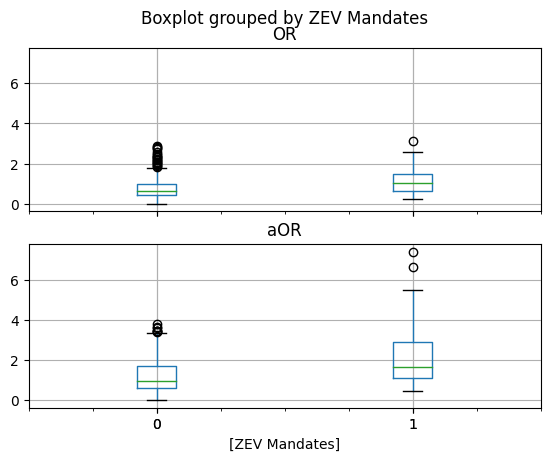

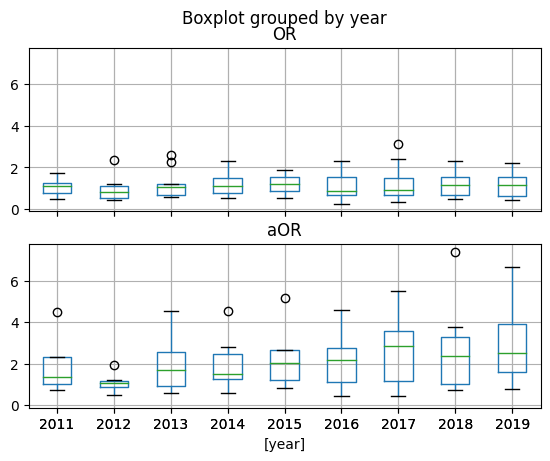

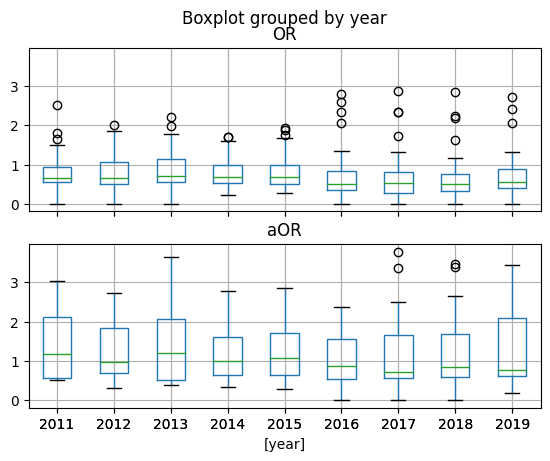

In [55]:
# OR
df.boxplot(column=['OR', 'aOR'], by=['ZEV Mandates'], layout = (2,1))
df[df['ZEV Mandates'] == 1].boxplot(column=['OR', 'aOR'], by=['year'], layout = (2,1))
df[df['ZEV Mandates'] == 0].boxplot(column=['OR', 'aOR'], by=['year'], layout = (2,1))

array([<AxesSubplot:title={'center':'AF'}, xlabel='[year]'>,
       <AxesSubplot:>], dtype=object)

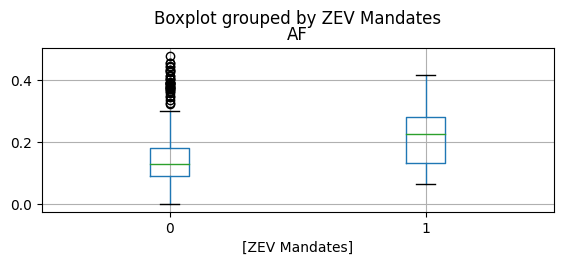

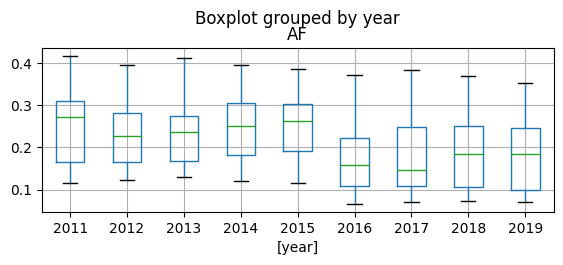

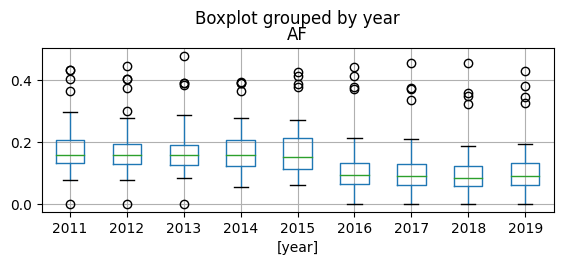

In [56]:
df.boxplot(column=['AF'], by=['ZEV Mandates'], layout = (2,1))
df[df['ZEV Mandates'] == 1].boxplot(column=['AF'], by=['year'], layout = (2,1))
df[df['ZEV Mandates'] == 0].boxplot(column=['AF'], by=['year'], layout = (2,1))

array([<AxesSubplot:title={'center':'incidence_trap'}, xlabel='[year]'>,
       <AxesSubplot:>], dtype=object)

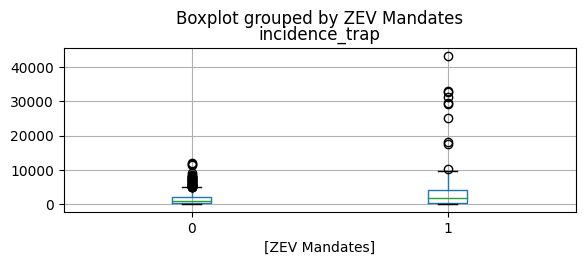

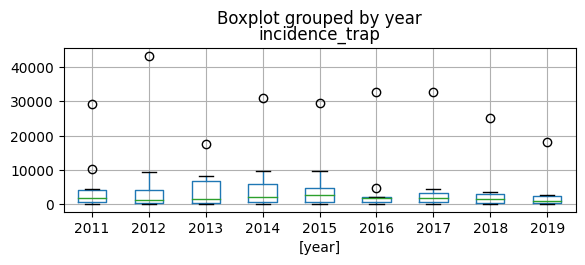

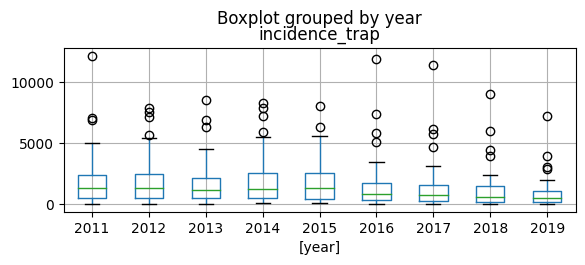

In [57]:
df.boxplot(column=['incidence_trap'], by=['ZEV Mandates'], layout = (2,1))
df[df['ZEV Mandates'] == 1].boxplot(column=['incidence_trap'], by=['year'], layout = (2,1))
df[df['ZEV Mandates'] == 0].boxplot(column=['incidence_trap'], by=['year'], layout = (2,1))

In [64]:
df[df['year'] == 2011].sort_values(by = 'incidence_trap', ascending=False)[['State', 'incidence_trap']]

,State,incidence_trap
4,California,29324
43,Texas,12159
32,New York,10210
13,Illinois,7021
38,Pennsylvania,6864
2,Arizona,4980
22,Michigan,4894
9,Florida,4622
30,New Jersey,4594
44,Utah,4175


In [63]:
df[df['year'] == 2019].sort_values(by = 'incidence_trap', ascending=False)[['State', 'incidence_trap']]

,State,incidence_trap
412,California,18026
451,Texas,7190
417,Florida,3959
410,Arizona,3078
421,Illinois,2851
440,New York,2760
438,New Jersey,2512
446,Pennsylvania,1975
429,Massachusetts,1805
436,Nevada,1704


In [92]:
df['ev_sales_norm'] = df.groupby('state_code')['ev_sales'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

C:\Users\harsh\AppData\Local\Temp\ipykernel_23160\1588981451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ev_sales_norm'] = df.groupby('state_code')['ev_sales'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


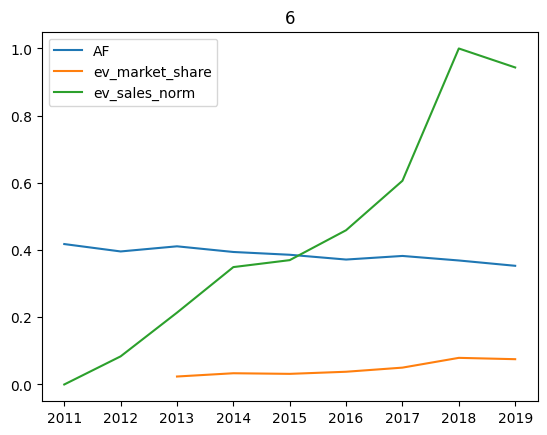

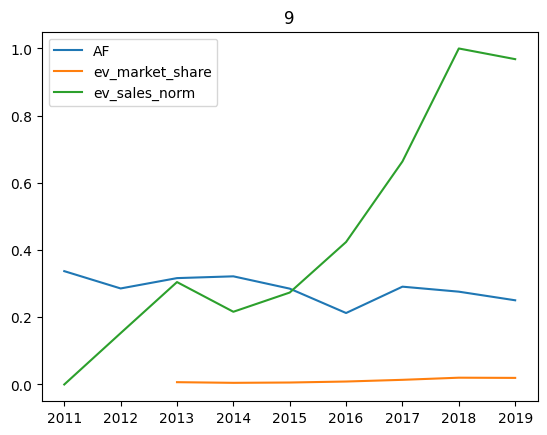

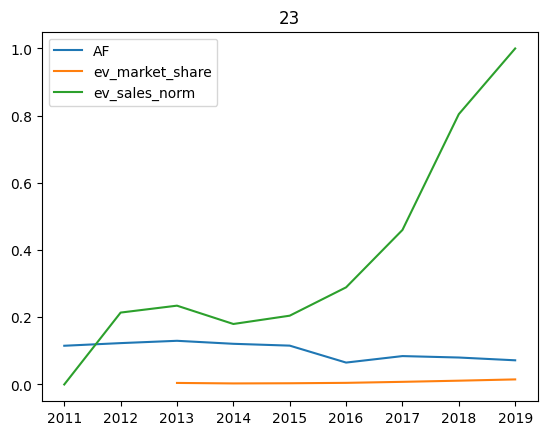

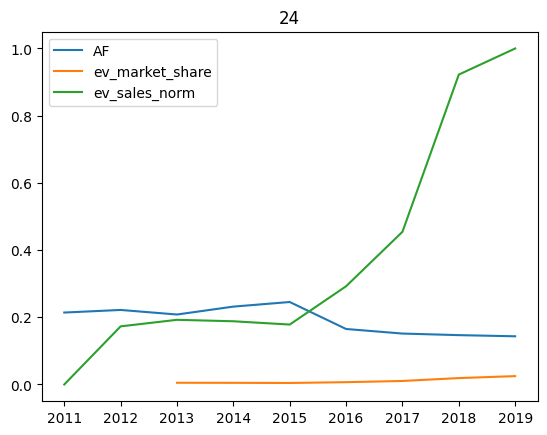

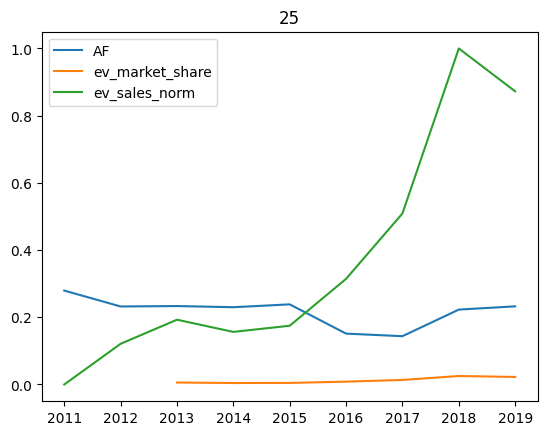

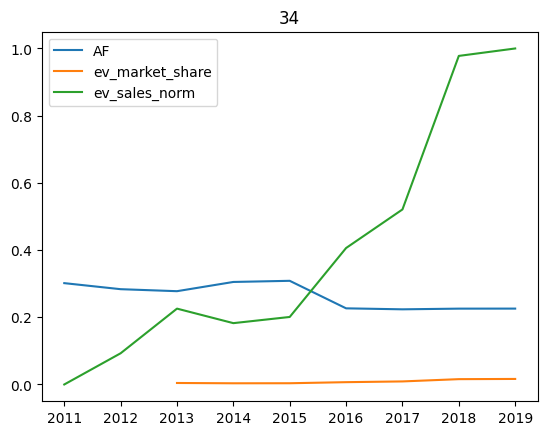

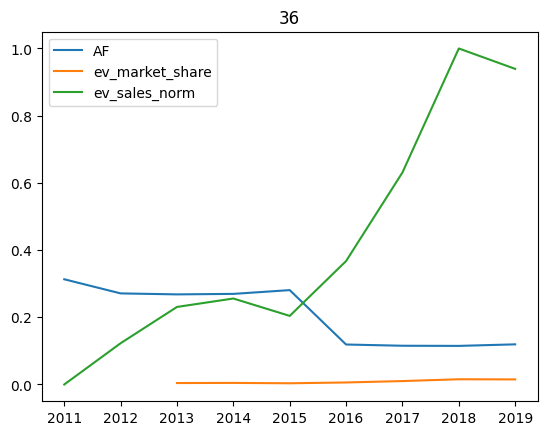

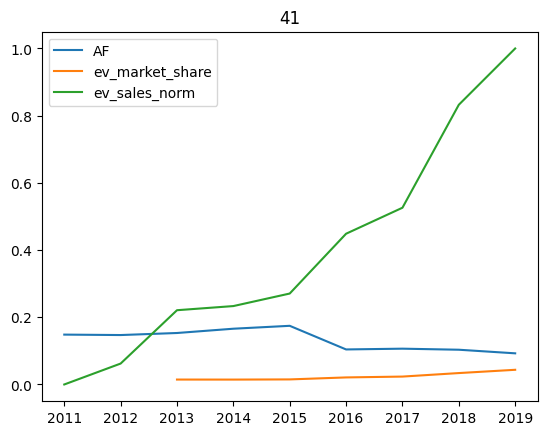

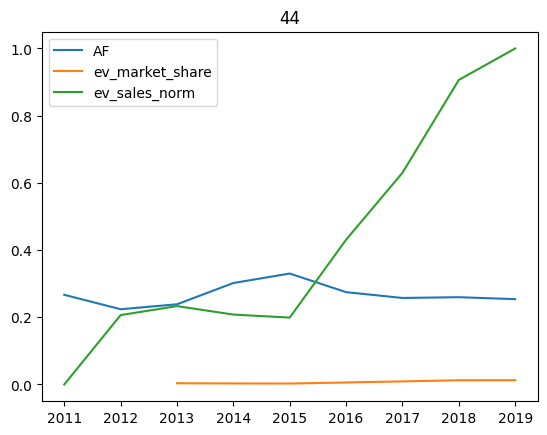

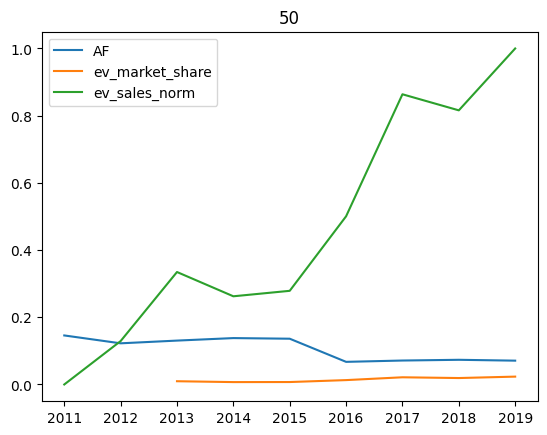

In [93]:
def plotlines(tdf, col1, cols = [], title=None):
    x, y = tdf['year'], tdf[col1]
    plt.plot(x, y, label = col1)
    if cols:
        for col in cols:
            plt.plot(x, tdf[col], label = col)
    #plt.ylim(min(0, tdf[col1].min()), tdf[col1].max())
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

for state_code in ZEV_STATES:
    tdf = df[df['state_code'] == state_code]
    plotlines(tdf, "AF", cols = ['ev_market_share', 'ev_sales_norm'], title=state_code)


<AxesSubplot:xlabel='year'>

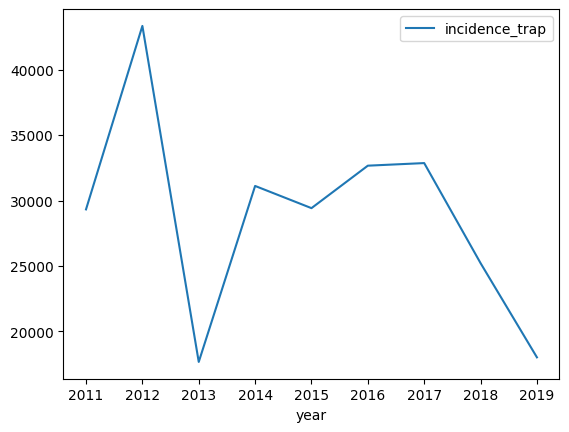

In [94]:
df[df['state_code']==6].plot.line(x='year', y = 'incidence_trap')

In [83]:
df['ev_sales_norm']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
454   NaN
455   NaN
456   NaN
457   NaN
458   NaN
Name: ev_sales_norm, Length: 458, dtype: float64

In [7]:
ev_df[ev_df['state_code'] == 1]

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,EPA Region,ev_sales,ev_market_share,total,nonev_sales
0,Alabama,0,NaN,18,NaN,55,NaN,2011,Alabama,1,4.0,73,NaN,NaN,NaN
51,Alabama,0,NaN,55,NaN,186,NaN,2012,Alabama,1,4.0,241,NaN,NaN,NaN
102,Alabama,0,0.0,77,0.0004,99,0.0005,2013,Alabama,1,4.0,176,0.0009,198000.0,197824.0
153,Alabama,0,0.0,87,0.0005,136,0.0007,2014,Alabama,1,4.0,223,0.0012,194286.0,194063.0
204,Alabama,0,0.0,69,0.0003,128,0.0006,2015,Alabama,1,4.0,197,0.0009,230001.0,229804.0
255,Alabama,0,0.0,115,0.0006,215,0.0011,2016,Alabama,1,4.0,330,0.0017,195455.0,195125.0
306,Alabama,0,0.0,163,0.0008,218,0.0011,2017,Alabama,1,4.0,381,0.0019,203750.0,203369.0
357,Alabama,0,0.0,527,0.0025,339,0.0016,2018,Alabama,1,4.0,866,0.0041,211875.0,211009.0
408,Alabama,0,0.0,722,0.0037,285,0.0015,2019,Alabama,1,4.0,1007,0.0052,195136.0,194129.0
